In [4]:
from google.colab import files
uploaded = files.upload()


Saving student_habits_performance.csv to student_habits_performance.csv


# Proyecto Final - Primera Entrega
### Curso de Data Science I - Coderhouse - Comision 67465


**Abstract**

Este proyecto tiene como objetivo explorar la relación entre los hábitos diarios de los estudiantes y su rendimiento académico, utilizando un dataset con información sobre 1000 estudiantes. Las variables incluyen datos como horas de estudio, uso de redes sociales, calidad del sueño, dieta, actividad física, asistencia a clases, salud mental, y nivel educativo de los padres, entre otros.

A partir de este análisis, buscamos identificar patrones o asociaciones significativas que permitan comprender cuáles factores influyen más en el rendimiento académico, medido a través del puntaje de examen. Se desarrollarán visualizaciones univariadas, bivariadas y multivariadas, acompañadas de análisis numéricos descriptivos e interpretaciones que nos acerquen a una posible respuesta sobre qué hábitos son más determinantes. Además, se identificarán valores perdidos y se establecerán hipótesis orientadas a la mejora del desempeño estudiantil.



**Preguntas e Hipótesis de Interés**

- ¿Qué hábitos diarios están más relacionados con el rendimiento académico de los estudiantes?

**Hipótesis:**
1. Los estudiantes que duermen más de 7 horas por noche obtienen puntajes más altos.
2. Menos tiempo en redes sociales está asociado con mejores calificaciones.
3. Una mayor frecuencia de ejercicio está positivamente correlacionada con el bienestar mental y, por lo tanto, con el rendimiento.
4. Los estudiantes con buena asistencia y una dieta adecuada tienen mejor rendimiento que aquellos que no.


In [5]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("student_habits_performance.csv")

# Primeras filas
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
# Verificar valores nulos
df.isnull().sum()


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


> ✅ No se encontraron valores nulos en el dataset.


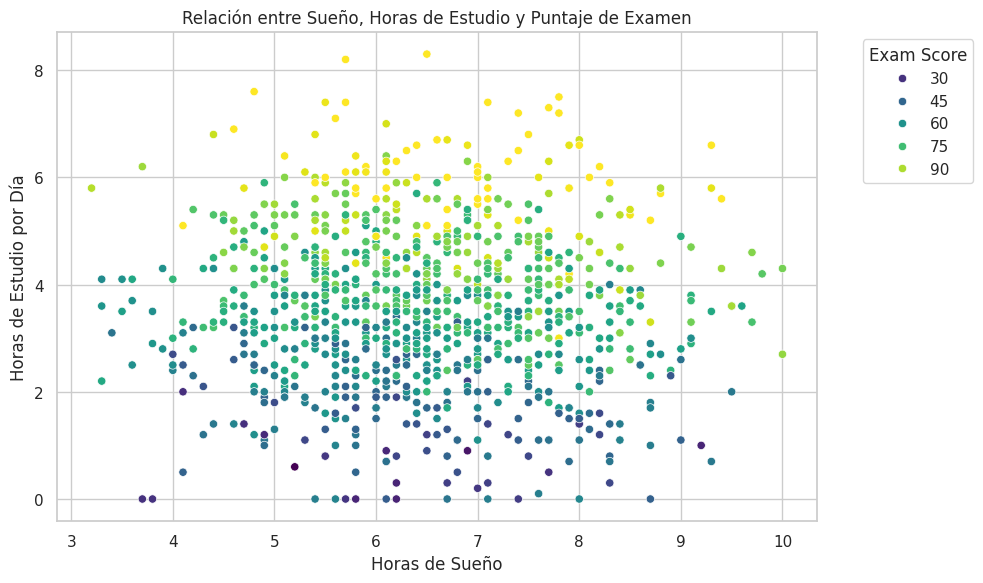

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sleep_hours", y="study_hours_per_day", hue="exam_score", palette="viridis")
plt.title("Relación entre Sueño, Horas de Estudio y Puntaje de Examen")
plt.xlabel("Horas de Sueño")
plt.ylabel("Horas de Estudio por Día")
plt.legend(title="Exam Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Interpretación:** Estudiantes con más horas de estudio y sueño moderado a alto tienden a obtener mejores resultados en el examen.


<ipython-input-8-0ad63dcbd725>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diet_quality", y="exam_score", palette="Set2")


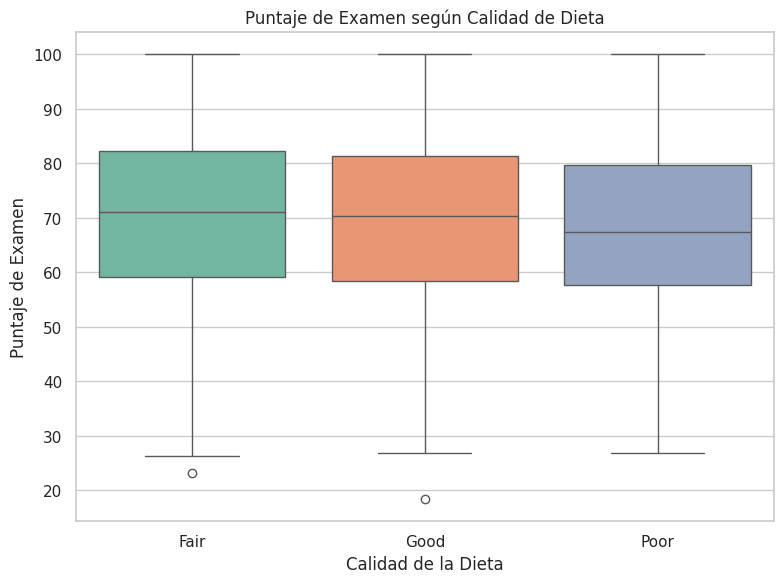

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="diet_quality", y="exam_score", palette="Set2")
plt.title("Puntaje de Examen según Calidad de Dieta")
plt.xlabel("Calidad de la Dieta")
plt.ylabel("Puntaje de Examen")
plt.tight_layout()
plt.show()


**Interpretación:** Estudiantes con dieta “Buena” tienden a tener puntajes más altos. La mediana del grupo “Poor” es considerablemente más baja.


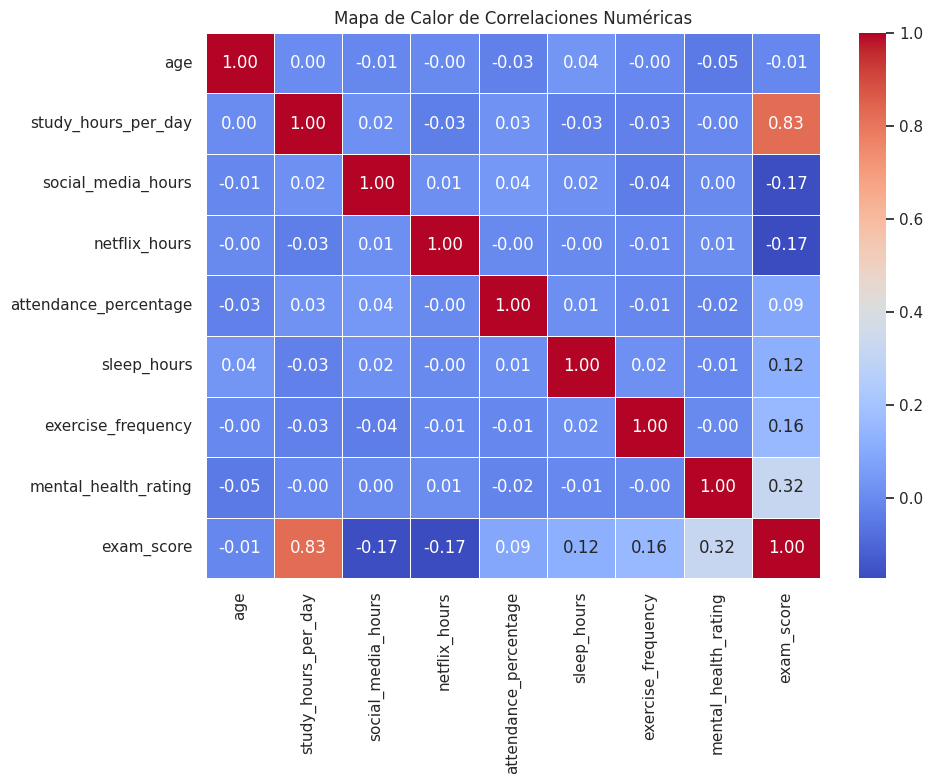

In [9]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones Numéricas")
plt.tight_layout()
plt.show()


**Interpretación:** Las variables más correlacionadas positivamente con el `exam_score` son `study_hours_per_day`, `attendance_percentage` y `mental_health_rating`. Las redes sociales y Netflix tienen una ligera correlación negativa.


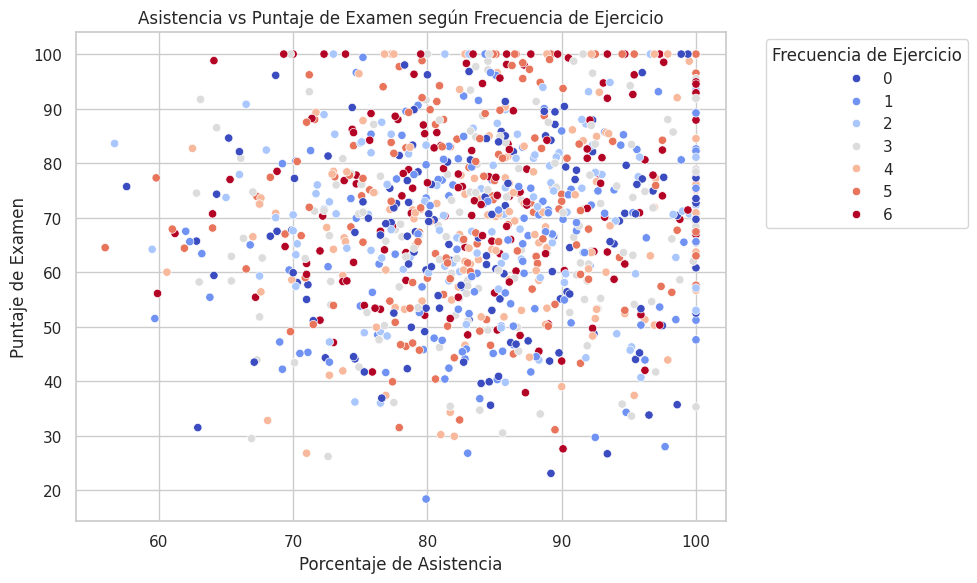

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="attendance_percentage", y="exam_score", hue="exercise_frequency", palette="coolwarm")
plt.title("Asistencia vs Puntaje de Examen según Frecuencia de Ejercicio")
plt.xlabel("Porcentaje de Asistencia")
plt.ylabel("Puntaje de Examen")
plt.legend(title="Frecuencia de Ejercicio", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Interpretación:** Los estudiantes con alta asistencia y mayor frecuencia de ejercicio presentan mejores puntajes.


**Conclusión parcial**

Los gráficos realizados permiten empezar a validar algunas de las hipótesis planteadas. Por ejemplo, se observa que mayor asistencia, más horas de estudio y mejor dieta están asociadas con puntajes más altos en el examen. También se confirma parcialmente que los estudiantes con frecuencia de ejercicio moderada a alta tienden a rendir mejor. En entregas futuras se explorarán modelos más complejos para validar estadísticamente estas relaciones.
